## Logistic Regression

In [39]:
# load libraries
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

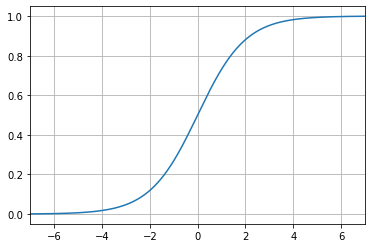

In [40]:
# takes advantage of the sigmoid curve
def sigmoid_function(x):
    """Give a sigmoid probability.

    Args:
        x (array of floats): _array of floats to find sigmoid probability for_.

    Returns:
        float (array of floats): _produces an array of sigmoid probabilities_.
    """
    return 1/(1/1+np.exp(-x))

x = np.arange(-7, 7, 0.01)
plt.figure()
plt.plot(x, sigmoid_function(x))
plt.grid()
plt.xlim(-7, 7)
plt.show()

Linear function: 
$$ f(X) = \beta_0 + \beta_1 x_1 +
\beta_2 x_2 + \cdots + \beta_d x_d $$

Sigmoid cureve:
$$ s(X) = \frac{1}{1+e^{-f(X)}} $$

Feed the linear function into the sigmoid function:
$$ s(X) = \frac{1}{1+e^{-(\beta_0 +
\beta_1 x_1 + \beta_2 x_2 + \cdots + \beta_d x_d)}} $$


model is smooth (ability to interpret s(X) as the probability of X belonging to a class. 0 or 1) and bound between 0 and 1 (easy to solve for the gradient)

- Soft predictions: probability of belonging to a class
- Hard predictions: decision of belonging to a class (0 or 1)

In [41]:
## Predicting whether a person will get hired based on hours spent prepping for the interview
# import random

# classes = list(np.zeros(20))
# classes.extend(list(np.ones(20)))
# random.shuffle(classes)


# hrs = pd.DataFrame({
#     'hours researching': list(np.arange(0, 10, 0.25)),
#     'hired': classes
# })

# hrs.head()

,hours researching,hired
0,0.00,1.0
1,0.25,0.0
2,0.50,1.0
3,0.75,0.0
4,1.00,1.0


In [42]:
hrs = pd.DataFrame(
    {
        "hours researching": [
            0,
            0,
            0.5,
            0.75,
            1.0,
            1.0,
            1.25,
            1.25,
            1.5,
            1.5,
            1.75,
            1.75,
            1.9,
            2.0,
            2.0,
            2.0,
            2.0,
            2.25,
            2.25,
            2.25,
            2.5,
            2.5,
            2.75,
            3.0,
            3.0,
        ],
        "hired": [0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1],
    }
)

hrs.head(10)


,hours researching,hired
0,0.00,0
1,0.00,0
2,0.50,0
3,0.75,0
4,1.00,0
5,1.00,0
6,1.25,1
7,1.25,0
8,1.50,0
9,1.50,0


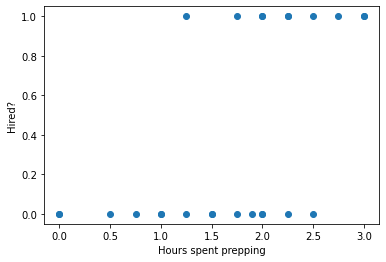

In [43]:
plt.figure()
plt.scatter(hrs['hours researching'], hrs['hired'])
plt.xlabel('Hours spent prepping')
plt.ylabel('Hired?')
plt.show()

In [44]:
import statsmodels.api as sm
X = hrs['hours researching']        # independent variable
y = hrs['hired']                    # dependent variable

X_add_constant = sm.add_constant(X) # manually add intercept to the model
## for the sm api we have to add this, otherwise we will only get beta1

In [45]:
log_reg = sm.Logit(y, X_add_constant)        # instatiate logistic regression
log_reg_result = log_reg.fit()  # fit model
log_reg_result.summary()

Optimization terminated successfully.
         Current function value: 0.467125
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                  hired   No. Observations:                   25
Model:                          Logit   Df Residuals:                       23
Method:                           MLE   Df Model:                            1
Date:                Sun, 04 Sep 2022   Pseudo R-squ.:                  0.3059
Time:                        09:06:17   Log-Likelihood:                -11.678
converged:                       True   LL-Null:                       -16.825
Covariance Type:            nonrobust   LLR p-value:                  0.001334
=====================================================================================
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                -4.8223      2.077     -2.322      0.020      -8.893      -0.752
hours researching     2.3694      1.023      2.316      0.021       0.364       4.375
=====================================================================================
"""

$$ s(X) = P(y | X) = \frac{1}{1+e^{-(-0.2940x + 0.0603x)}}$$

the values obtained control how stretched the sigmoid curve will be. they are the log odds

In [46]:
log_reg_result.params

const               -4.822299
hours researching    2.369391
dtype: float64

In [47]:
beta0 = log_reg_result.params[0]
beta1 = log_reg_result.params[1]
print(f"beta0 [log odds]: {beta0}")
print(f"beta1 [logg odds] :{beta1}")

beta0 [log odds]: -4.822299267254163
beta1 [logg odds] :2.3693913228488817


In [54]:
print(f"beta0 [odds ratio]: {np.exp(beta0)}")
print(f"beta1 [odds ratio] :{np.exp(beta1)}")

beta0 [odds ratio]: 0.00804826074631037
beta1 [odds ratio] :10.690883007076232


- the odds of getting hired if a person has studied/prepped for the interview is 0.008.
- for every one unit increase in hours prepped, the odds of getting hired increase by 10.69


In [55]:
# check if this is true
hours_prepped = [i for i in range(10)]
for hours in hours_prepped:
    linear_combination = -4.82 + 2.369 * hours #plug in regression results
    prob_hired = sigmoid_function(linear_combination) #find prob of getting hired for each i
    prop_not_hired = 1 - prob_hired

    odds_ratio = prob_hired/prop_not_hired

    print(f"After {hours} hours of prepping the")
    print(f"Probability of being hired is: {prob_hired}")
    print(f"Odds ratio is {odds_ratio}")
    print("\n")


After 0 hours of prepping the
Probability of being hired is: 0.00800223481421624
Odds ratio is 0.008066787139099614


After 1 hours of prepping the
Probability of being hired is: 0.07936545186589644
Odds ratio is 0.08620733604528572


After 2 hours of prepping the
Probability of being hired is: 0.4795114791148384
Odds ratio is 0.9212719586963489


After 3 hours of prepping the
Probability of being hired is: 0.9077946465073078
Odds ratio is 9.845357260945327


After 4 hours of prepping the
Probability of being hired is: 0.9905850791282914
Odds ratio is 105.21438179103076


After 5 hours of prepping the
Probability of being hired is: 0.9991114227521378
Odds ratio is 1124.3945590053029


After 6 hours of prepping the
Probability of being hired is: 0.9999167850233429
Odds ratio is 12016.067602155472


After 7 hours of prepping the
Probability of being hired is: 0.9999922126332706
Odds ratio is 128412.1125135047


After 8 hours of prepping the
Probability of being hired is: 0.99999927129782

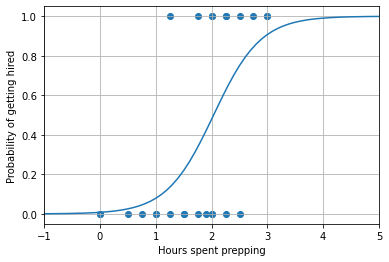

In [56]:
x_points = np.arange(-7, 7, 0.1)
plt.figure()
plt.scatter(hrs['hours researching'], hrs['hired'])
plt.plot(x_points, sigmoid_function(beta0 + beta1*x_points))
plt.grid()
plt.xlim(-1, 5)
plt.xlabel('Hours spent prepping')
plt.ylabel('Probability of getting hired')
plt.show()

1. After four hours we are almost certain to get hired, but the propability is never 100%
2. Making assumptions about the data beyond the range of its input. 

In [57]:
new_X = np.array([0.3, 1.4, 2.7, 5.1])
prob_hired = sigmoid_function(beta0 + beta1*new_X)
print(prob_hired)

[0.01611939 0.18165847 0.82850337 0.99929851]


In [58]:
new_X_add_constant = sm.add_constant(new_X)
log_reg_result.predict(new_X_add_constant)

array([0.01611939, 0.18165847, 0.82850337, 0.99929851])

In [59]:
new_candidates = pd.DataFrame(
    {"Hours": new_X, "Prob_Hired": prob_hired.round(3)}, index=["Jane", "Kevin", "Bob", "Samantha"]
)
new_candidates      # soft decision (just based on probabilities)

,Hours,Prob_Hired
Jane,0.3,0.016
Kevin,1.4,0.182
Bob,2.7,0.829
Samantha,5.1,0.999


In [60]:
hired = np.where(prob_hired > 0.5, 1, 0)
new_candidates['hired'] = hired
new_candidates

,Hours,Prob_Hired,hired
Jane,0.3,0.016,0
Kevin,1.4,0.182,0
Bob,2.7,0.829,1
Samantha,5.1,0.999,1
